<center>
    <h1> Test de recrutement - Data Scientist </h1>
    <h2> Air France - KLM </h2>
    <h2> Commercial Data Analytics - Mai 2022 </h2>
    <h4> Karim Derouiche </h4>
    </center>

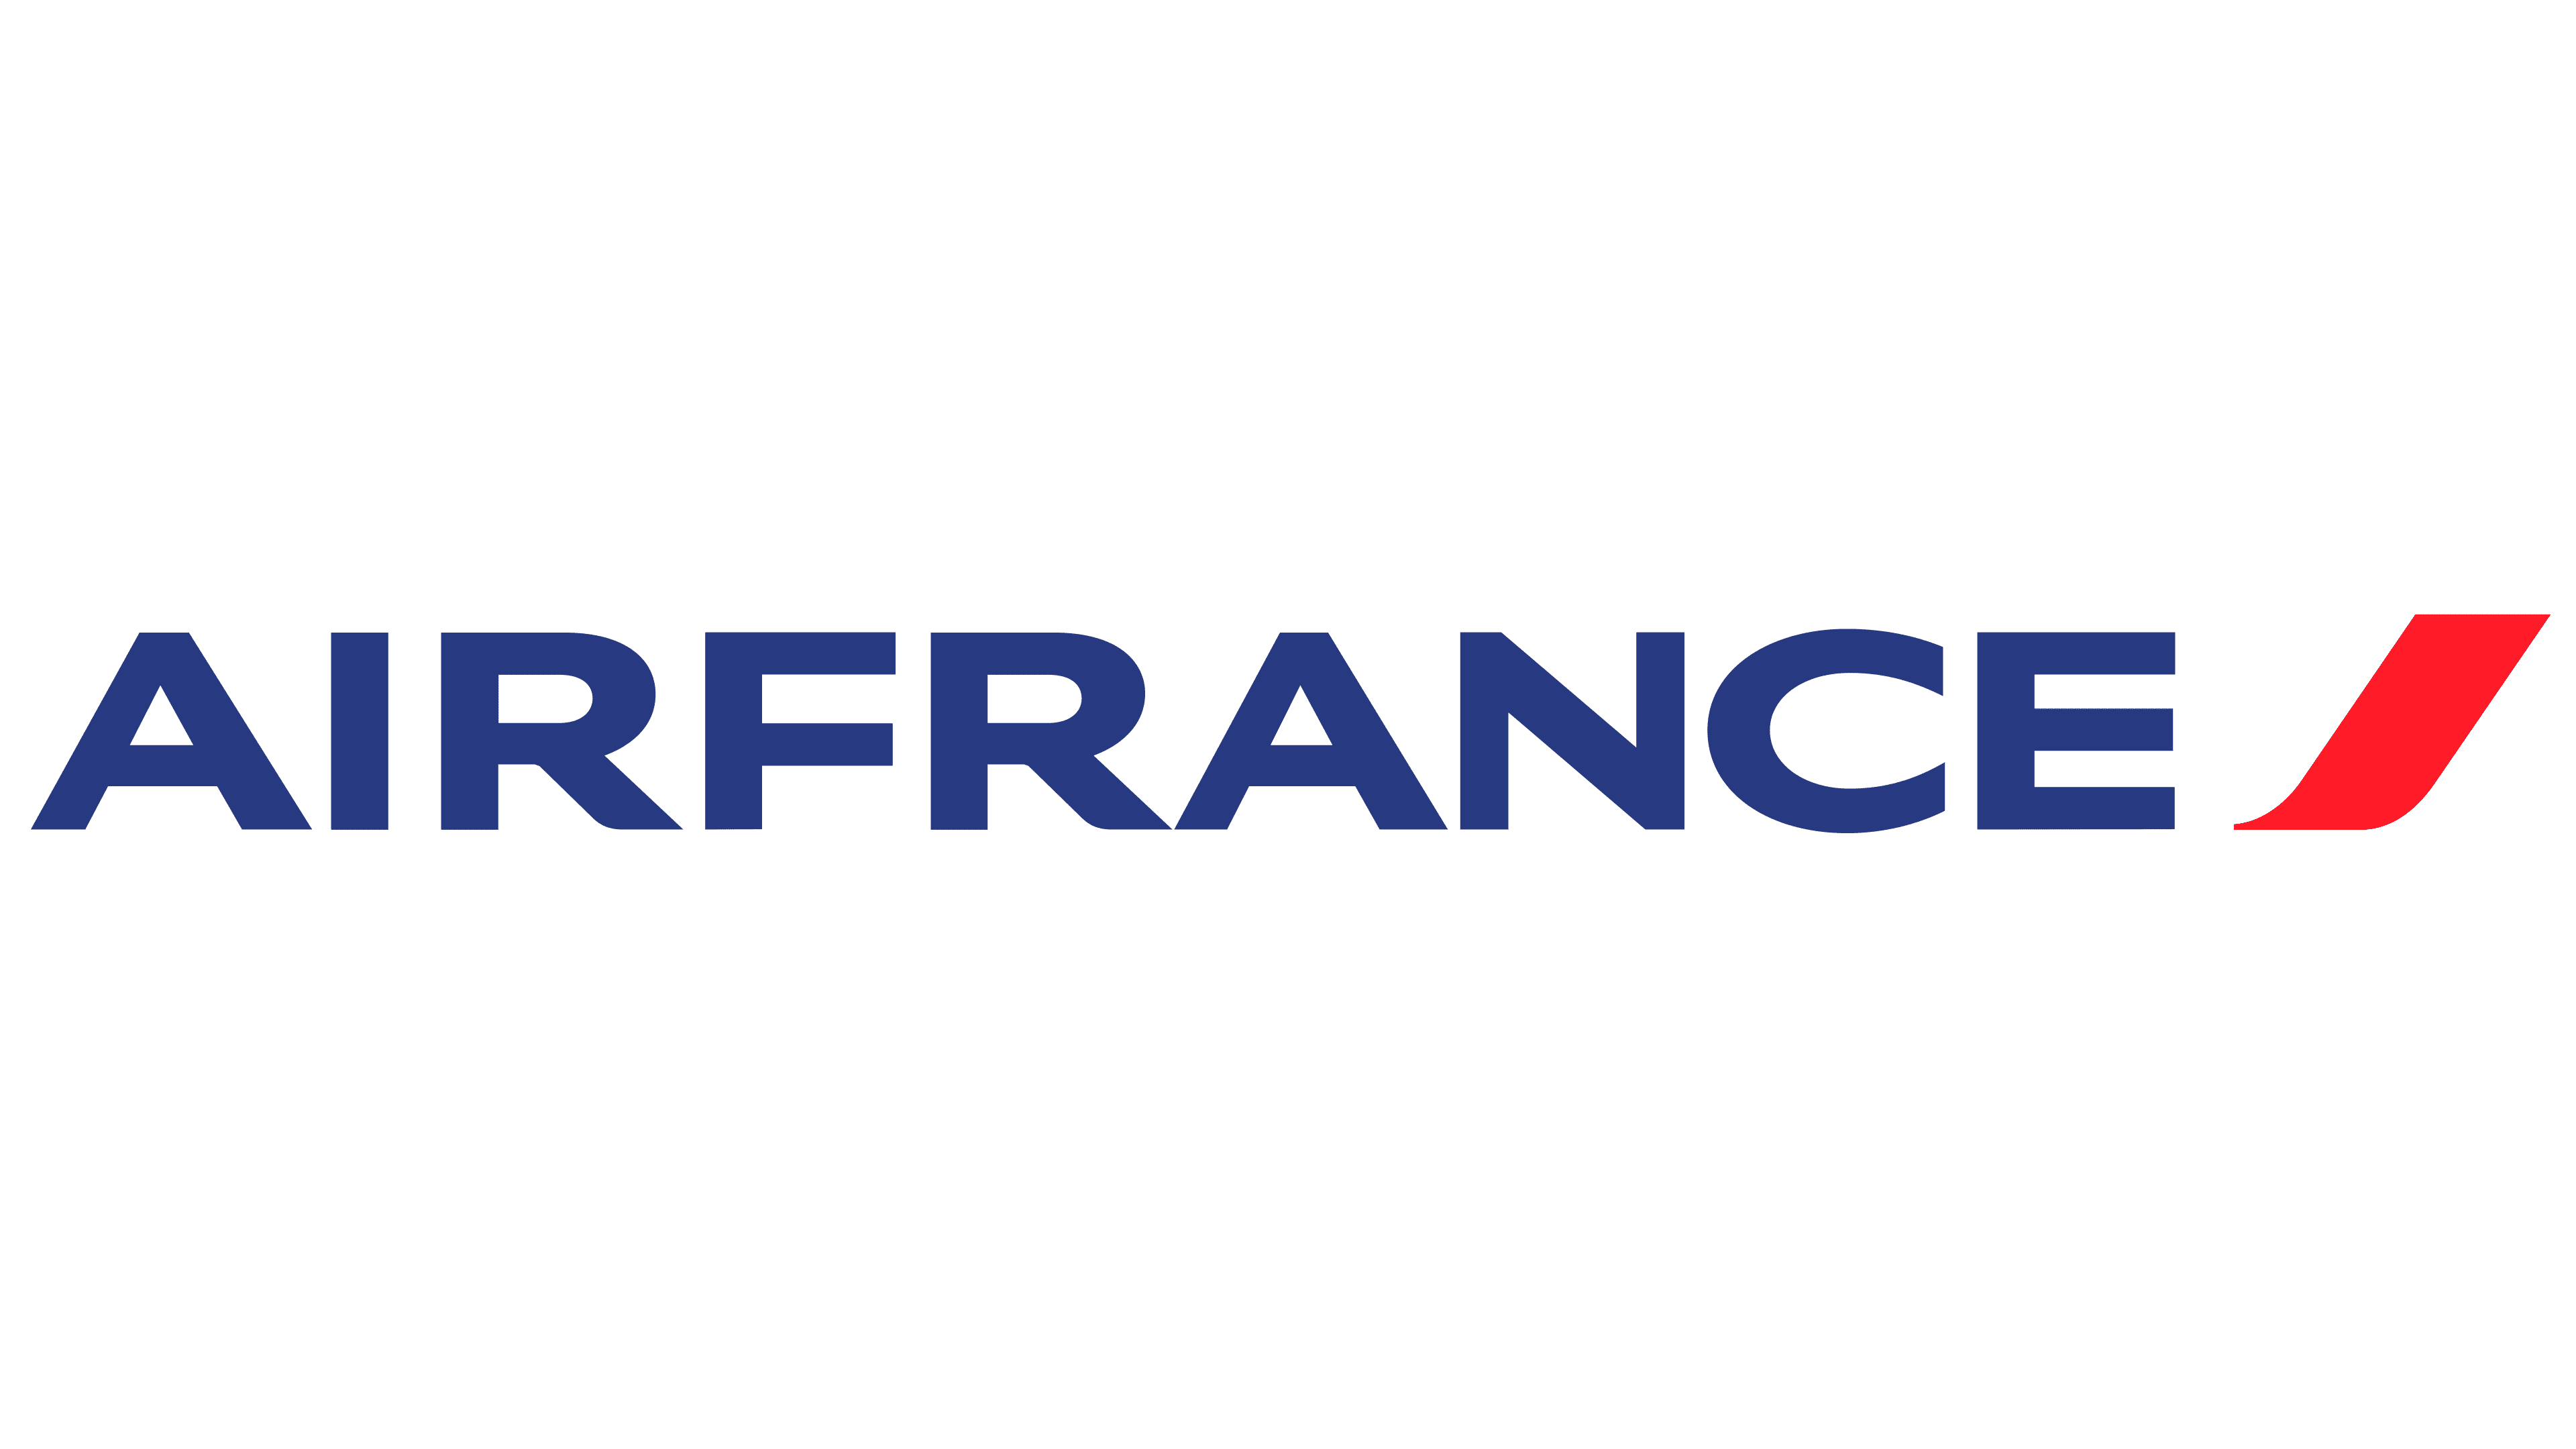

# Exercice 1 - 📊 Exploration et visualisation de données

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Extraction et traitement initial des données

In [100]:
# Import du jeu de données de vol
flight_data = pd.read_csv("../data/flight_data_extract.csv")

# Ajustement des colonnes temporelles
flight_data["FLIGHT_DATE"] = pd.to_datetime(flight_data["FLIGHT_DATE"])
flight_data["PNR_DAT_AMD"] = pd.to_datetime(flight_data["PNR_DAT_AMD"])

# Ajustement des colonnes booléennes
flight_data.ONLINE_FLAG = flight_data.ONLINE_FLAG.replace("Y", True).replace("N", False)
flight_data.OW_flag = flight_data.OW_flag.replace("Y", True).replace("N", False)

In [101]:
# Import des données de zone
area_data = pd.read_csv("../data/area.csv")

# Création du jeu de données final, comme jointure des deux précédents
final_data = flight_data.merge(area_data, left_on="OND_ORI", right_on="CPN_ORI_PLN_ARP")


#### Création des groupes - Zone Géographique

In [158]:
# On initie la nouvelle colonne.
final_data["Group_Geo"] = np.nan

# PARTIE EUROPE & France
final_data["Group_Geo"] = np.where(final_data["LIB_ZON_IAT_ANG"]=="Europe", "Europe", final_data["Group_Geo"])

final_data["Group_Geo"] = np.where(final_data["COD_PAY"]=="FR", "France", final_data["Group_Geo"])


# PARTIE AMERIQUE DU NORD
final_data["Group_Geo"] = np.where(final_data["LIB_ZON_IAT_ANG"]=="North America", "Amérique du Nord", 
                                   final_data["Group_Geo"])


# PARTIE ASIE
# on va faire l'hypothèse de mettre le Pacifique avec l'Asie, car il s'agit de la zone au dessus.
# Même hypothèse pour le Moyen Orient.
final_data["Group_Geo"] = np.where(final_data["LIB_ZON_IAT_ANG"]=="Asia", "Asie", final_data["Group_Geo"])

final_data["Group_Geo"] = np.where(final_data["LIB_ZON_IAT_ANG"]=="S-E Pacific", "Asie", final_data["Group_Geo"])

final_data["Group_Geo"] = np.where(final_data["LIB_ZON_IAT_ANG"]=="Middle East", "Asie", final_data["Group_Geo"])


# PARTIE AFRIQUE
final_data["Group_Geo"] = np.where(final_data["LIB_ZON_IAT_ANG"]=="North Africa", "Afrique", final_data["Group_Geo"])

final_data["Group_Geo"] = np.where(final_data["LIB_ZON_IAT_ANG"]=="Africa and Indian Ocean", 
                                   "Afrique", final_data["Group_Geo"])


# PARTIE AMERIQUE DU SUD

final_data["Group_Geo"] = np.where(final_data["LIB_ZON_IAT_ANG"]=="South America and Caribean", 
                                   "Amérique du Sud", final_data["Group_Geo"])


# PARTIE Caraibes & Océan Indien
# Pour cette partie, nous cherchons deux zones en dessous.

final_data["Group_Geo"] = np.where(final_data["LIB_SUB_RGN_ANG"]=="Caribbean", 
                                   "Océan Indien et Caraïbes", final_data["Group_Geo"])

final_data["Group_Geo"] = np.where(final_data["LIB_SUB_RGN_ANG"]=="Indian Ocean", 
                                   "Océan Indien et Caraïbes", final_data["Group_Geo"])

#### Création des groupes - Contribution Client

In [170]:
# Nous créons la liste des 3 quantiles:
quartiles = list(final_data.NET_REV.quantile([.25, .5, .75]))

# On initie la nouvelle variable
final_data["Contrib_Client"] = np.nan

final_data["Contrib_Client"] = np.where(final_data["NET_REV"] <= quartiles[0], "Basse Contribution", 
                                        final_data["Contrib_Client"])

final_data["Contrib_Client"] = np.where(final_data["NET_REV"] => quartiles[0], "Moyenne Contribution", 
                                       final_data["Contrib_Client"])["Contrib_Client"] = np.where(final_data["NET_REV"] >= quartiles[0], "Moyenne Contribution", 
                                       final_data["Contrib_Client"])

final_data["Contrib_Client"] = np.where(final_data["NET_REV"] >= quartiles[2], "Haute Contribution", 
                                       final_data["Contrib_Client"])

###### Filtrage final sur le dataframe

In [191]:
df = final_data.loc[:, list(flight_data.columns) + ["Group_Geo", "Contrib_Client"]]

# PARTIE 1 - Analyse des tendances

In [193]:
df.head().T

,0,1,2,3,4
FLIGHT_DATE,2019-04-05 00:00:00,2021-04-04 00:00:00,2019-04-06 00:00:00,2019-04-05 00:00:00,2021-04-06 00:00:00
TKT_NUM,419304878,434753106,623647409,422490111,434667847
ACTIVITY_TIER,A,A,A,A,A
OPE_CRR,KL,KL,AF,KL,KL
ONLINE_FLAG,True,False,False,False,True
OW_flag,False,False,False,False,False
OND_ORI,KBP,KBP,KBP,KBP,KBP
NET_REV,11.39,121.61,512.16,99.61,26.6
haul,MH,MH,LH,MH,MH
DIS_CHA,E BUSINESS,CALL CENTER,GENERALIST,CALL CENTER,E BUSINESS


### Analyse Globale

###### Tickets vendus

In [203]:
# Création du jeu de données de valeurs agrégées de tickets vendus par jour et année
TKT_unique = df.groupby([df.FLIGHT_DATE.dt.day,
                                  df.FLIGHT_DATE.dt.year
                                  ]).agg({"TKT_NUM": "nunique"}).reset_index(0).rename(
    columns={"FLIGHT_DATE": "jour"}).reset_index().rename(
    columns={"FLIGHT_DATE": "année"})

# Création du jeu de données à plot
plotdata = pd.pivot_table(TKT_unique, values="TKT_NUM", index="jour", columns="année", aggfunc='sum')


In [211]:
# Calcul des évolutions moyennes par année
TKT_unique.groupby("année").agg({"TKT_NUM": "mean"}).pct_change()

,TKT_NUM
année,
2019,NaN
2020,-0.982112
2021,10.369824


<Figure size 432x288 with 0 Axes>

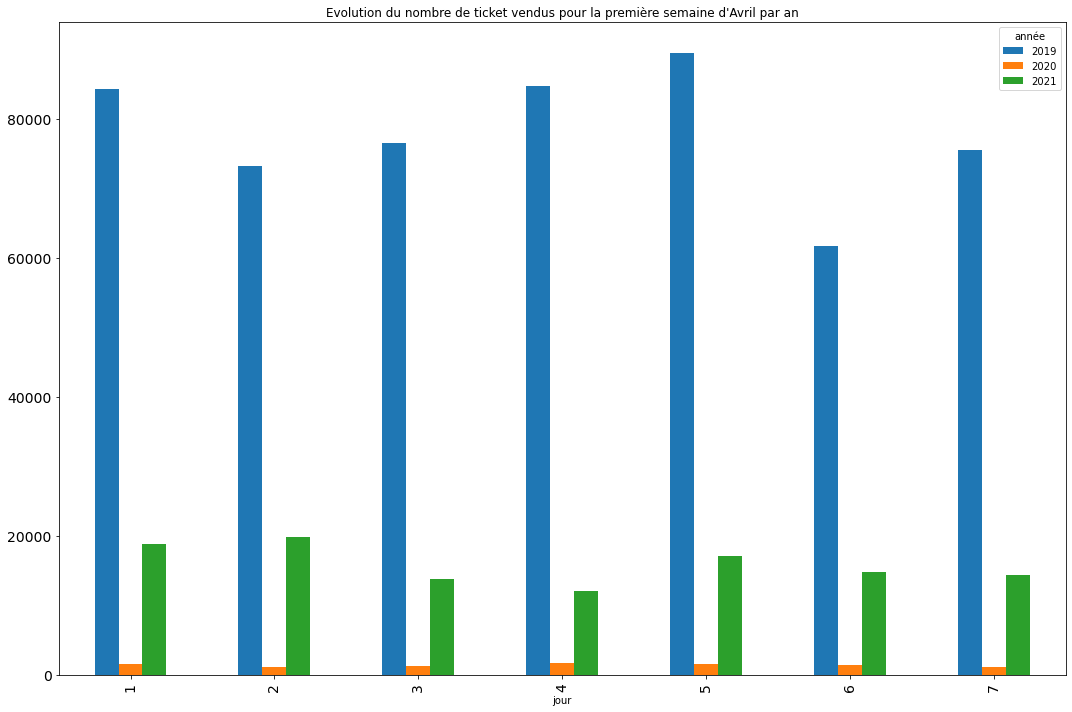

In [206]:
# Création du graphique de l'Evolution du nombre de ticket vendus pour la première semaine d'Avril par an
plt.figure()
pd.pivot_table(TKT_unique, values="TKT_NUM", index="jour", columns="année", aggfunc='sum').plot(kind="bar", 
                                                                                                figsize=(15, 10))

plt.title("Evolution du nombre de ticket vendus pour la première semaine d'Avril par an")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("1_global.png", transparent=True)
plt.show()

<Figure size 432x288 with 0 Axes>

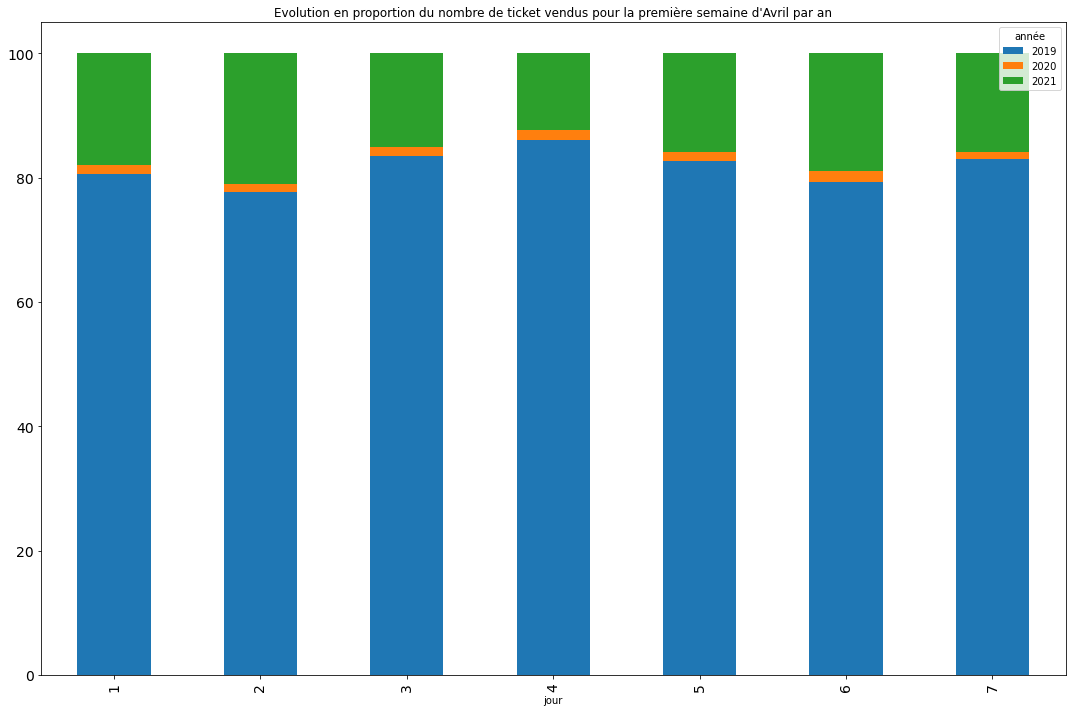

In [208]:
# Création du graphique de l'Evolution en proportion du nombre de ticket vendus pour la première semaine d'Avril par an
plt.figure()
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(15, 10))

plt.title("Evolution en proportion du nombre de ticket vendus pour la première semaine d'Avril par an")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("1_global_prop.png", transparent=True)
plt.show()

###### Chiffre d'affaires

In [76]:
# Création du jeu de données de valeurs agrégées de chiffre d'affaires par jour et année
CA_sum = df.groupby([df.FLIGHT_DATE.dt.day,
                                  df.FLIGHT_DATE.dt.year
                                  ]).agg({"NET_REV": "sum"}).reset_index(0).rename(
    columns={"FLIGHT_DATE": "jour"}).reset_index().rename(
    columns={"FLIGHT_DATE": "année"})

# Création du jeu de données à plot
plotdata = pd.pivot_table(CA_sum, values="NET_REV", index="jour", columns="année", aggfunc='sum')


In [212]:
# Calcul des évolutions moyennes par année
CA_sum.groupby("année").agg({"NET_REV": "mean"}).pct_change()

,NET_REV
année,
2019,NaN
2020,-0.979520
2021,6.283713


<AxesSubplot:xlabel='jour'>

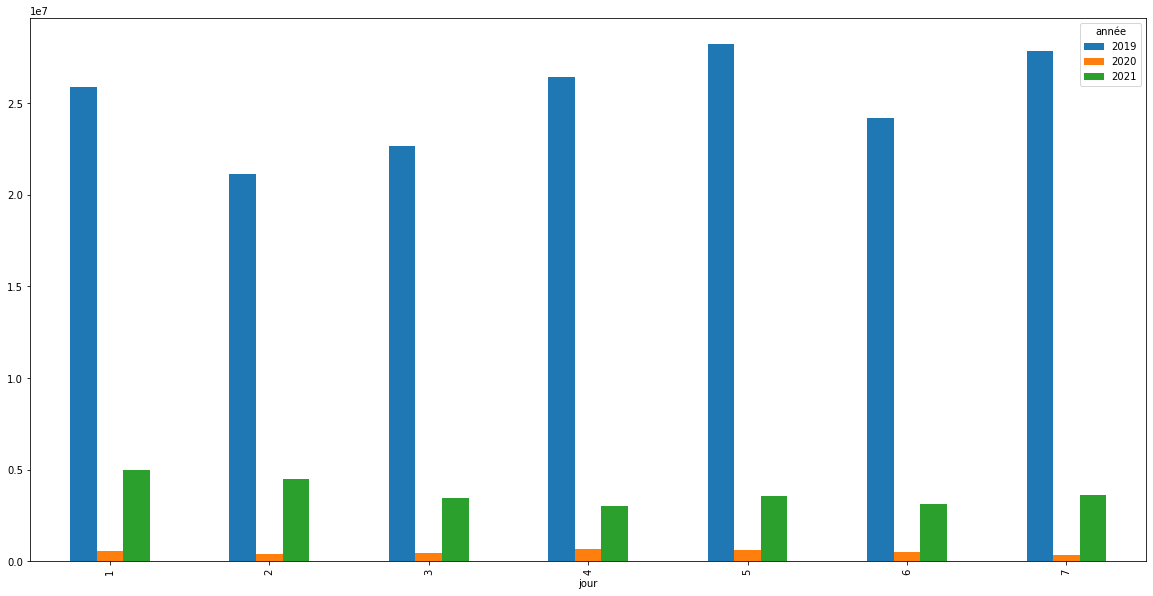

In [77]:
# Même graphique pour le CA
plotdata.plot(kind="bar", figsize=(20, 10))

<AxesSubplot:xlabel='jour'>

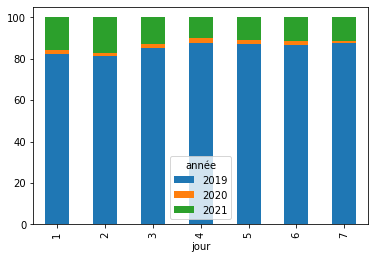

In [78]:
# Même graphique pour le CA
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

<Figure size 432x288 with 0 Axes>

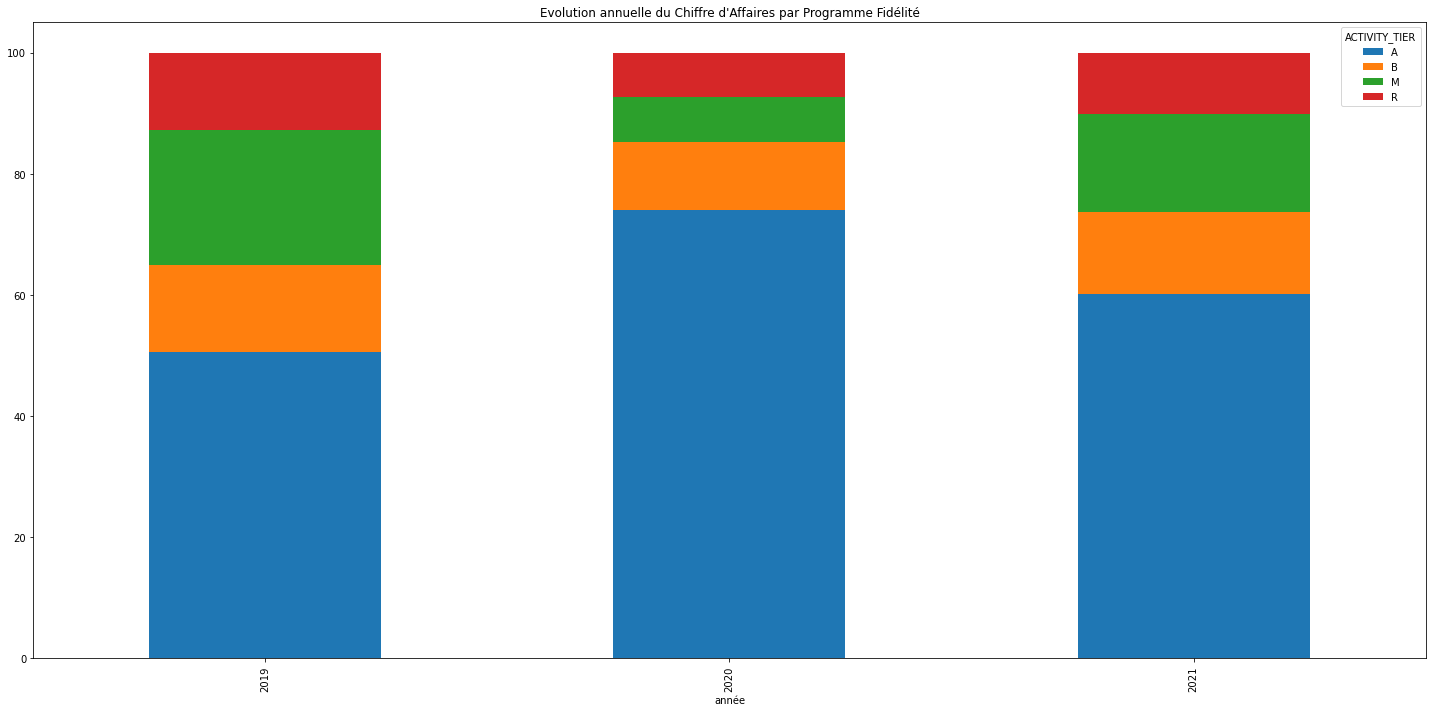

<Figure size 432x288 with 0 Axes>

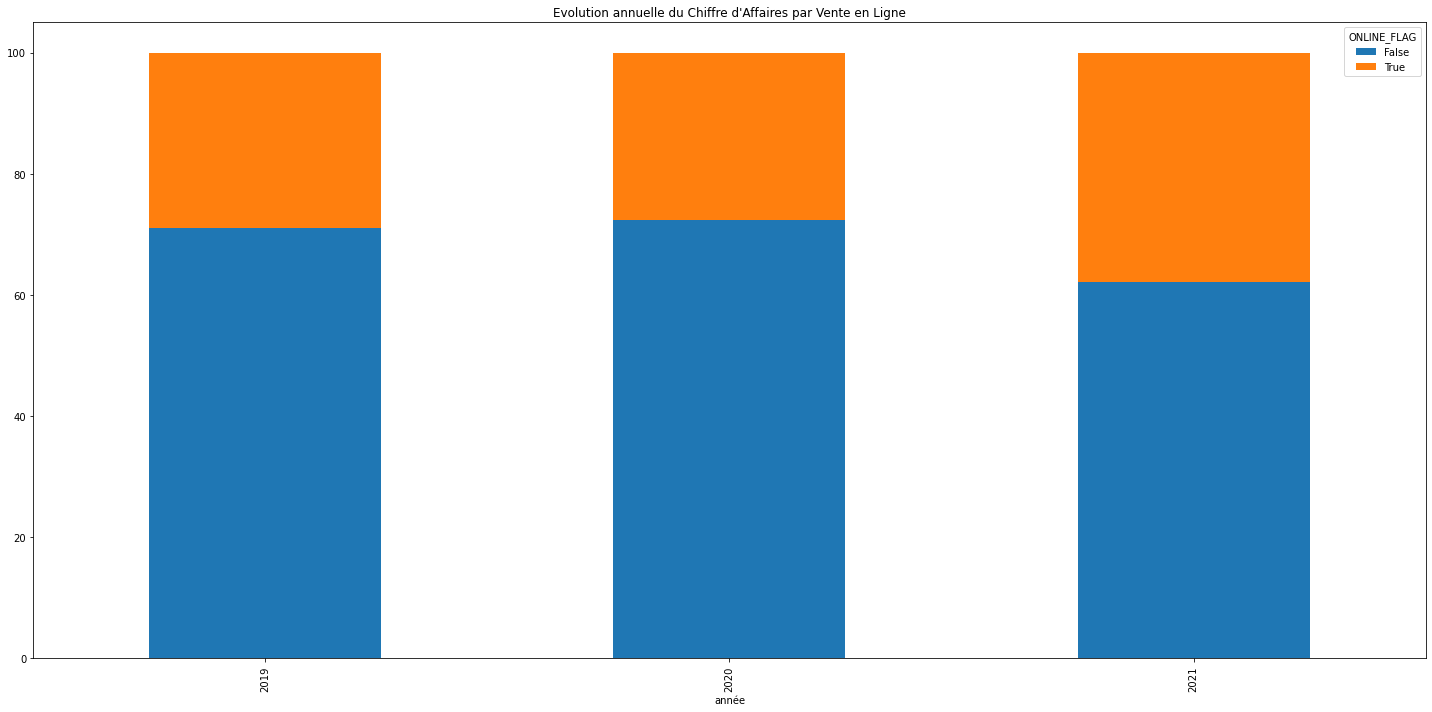

<Figure size 432x288 with 0 Axes>

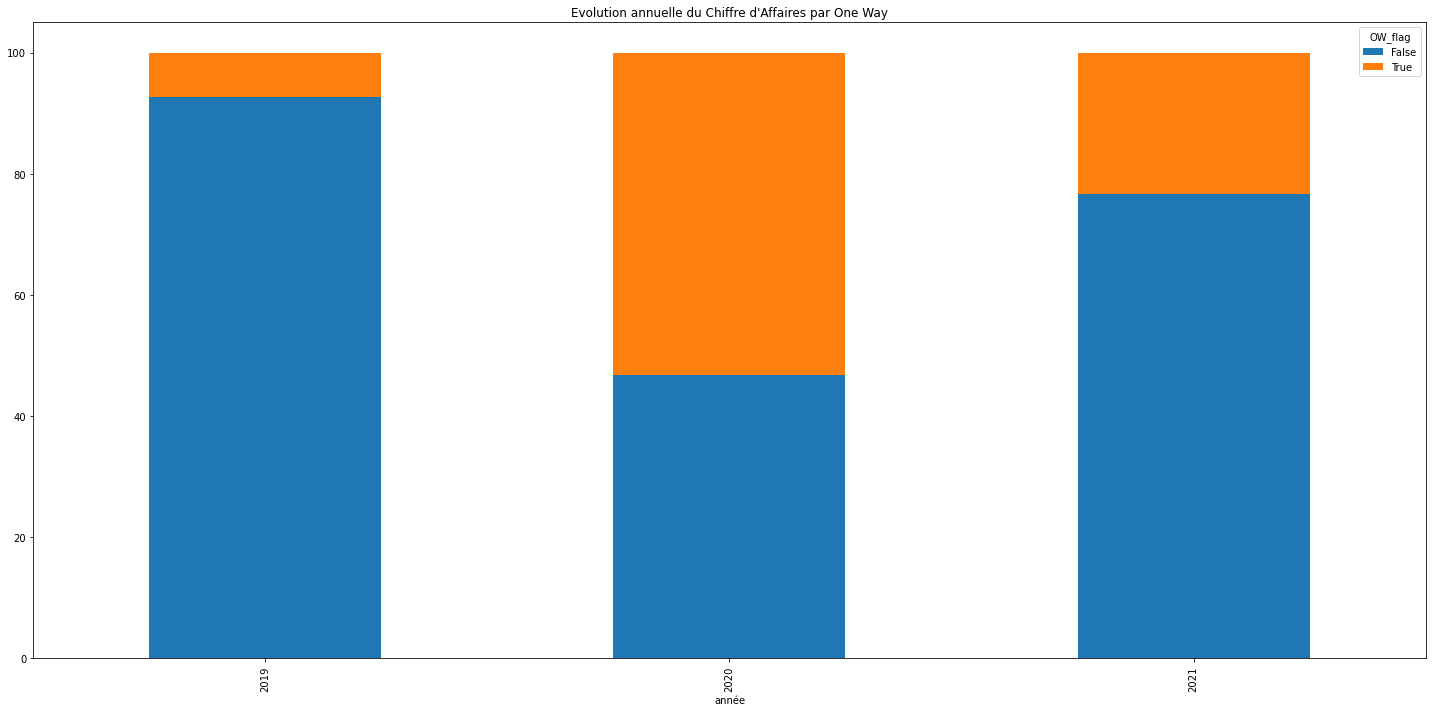

<Figure size 432x288 with 0 Axes>

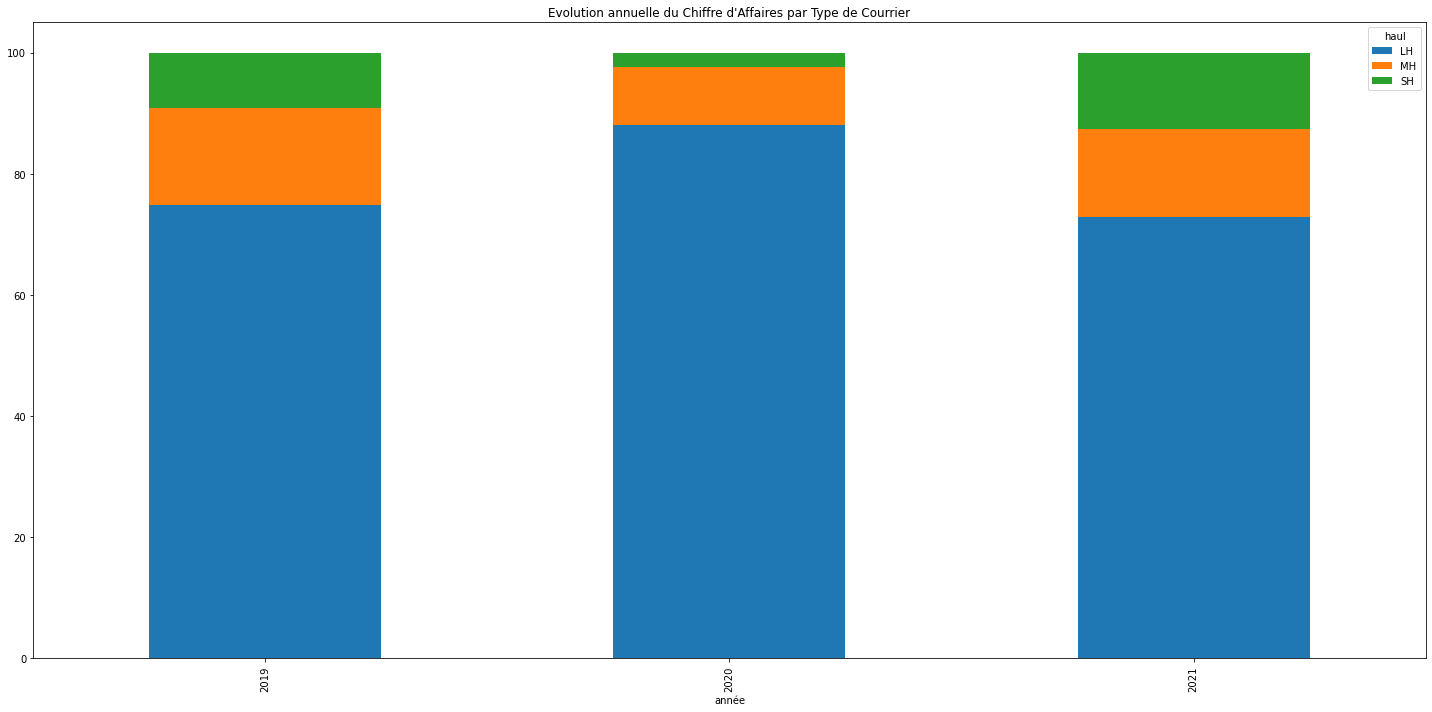

In [221]:
## Création de quelques graphiques segmentés

for col, name in zip(["ACTIVITY_TIER", "ONLINE_FLAG", "OW_flag", "haul"], 
                     ["Programme Fidélité", "Vente en Ligne", "One Way", "Type de Courrier"]):
    DATA = df.groupby([df.FLIGHT_DATE.dt.year,
                                      df[col]
                                      ]).agg({"NET_REV": "sum"}).reset_index().rename(
        columns={"FLIGHT_DATE": "année"})

    plotdata = pd.pivot_table(DATA, values="NET_REV", index="année", columns=col, aggfunc='sum')
    
    plt.figure()
    stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
    stacked_data.plot(kind="bar", stacked=True, figsize=(20, 10))
    plt.title("Evolution annuelle du Chiffre d'Affaires par {}".format(name))
    plt.tight_layout()
    plt.savefig("1_global_{}".format(col), transparent=True)
    plt.show()

### Analyse Géographique

<Figure size 432x288 with 0 Axes>

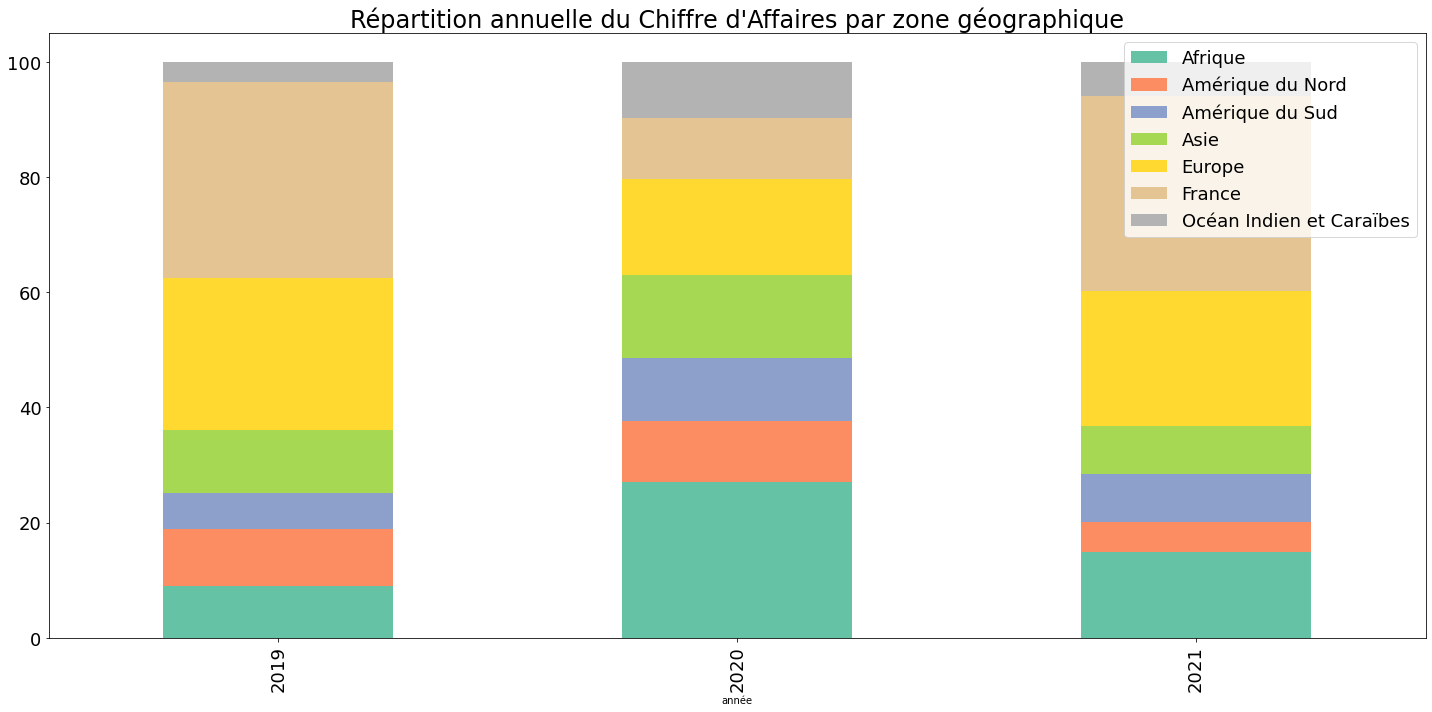

In [323]:
# Groupby
DATA = df.groupby([df.FLIGHT_DATE.dt.year,
                                  df["Group_Geo"]
                                  ]).agg({"NET_REV": "sum"}).reset_index().rename(
    columns={"FLIGHT_DATE": "année"})

# Pivot Table
plotdata = pd.pivot_table(DATA, values="NET_REV", index="année", columns="Group_Geo", aggfunc='sum')

# Création du graph
plt.figure()
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(20, 10), colormap="Set2")
plt.title("Répartition annuelle du Chiffre d'Affaires par zone géographique", fontsize = 24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc= 1, prop={'size': 18})
plt.tight_layout()
plt.savefig("1_global_geo_prop", transparent=True)
plt.show()

In [329]:
# On récupère les variations de CA par Zone et par an
plotdata.pct_change()

Group_Geo,Afrique,Amérique du Nord,Amérique du Sud,Asie,Europe,France,Océan Indien et Caraïbes
année,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,-0.939290,-0.977748,-0.964274,-0.972932,-0.987234,-0.993640,-0.942406
2021,3.014992,2.519585,4.546164,3.164026,9.253030,22.113861,3.438195


<Figure size 432x288 with 0 Axes>

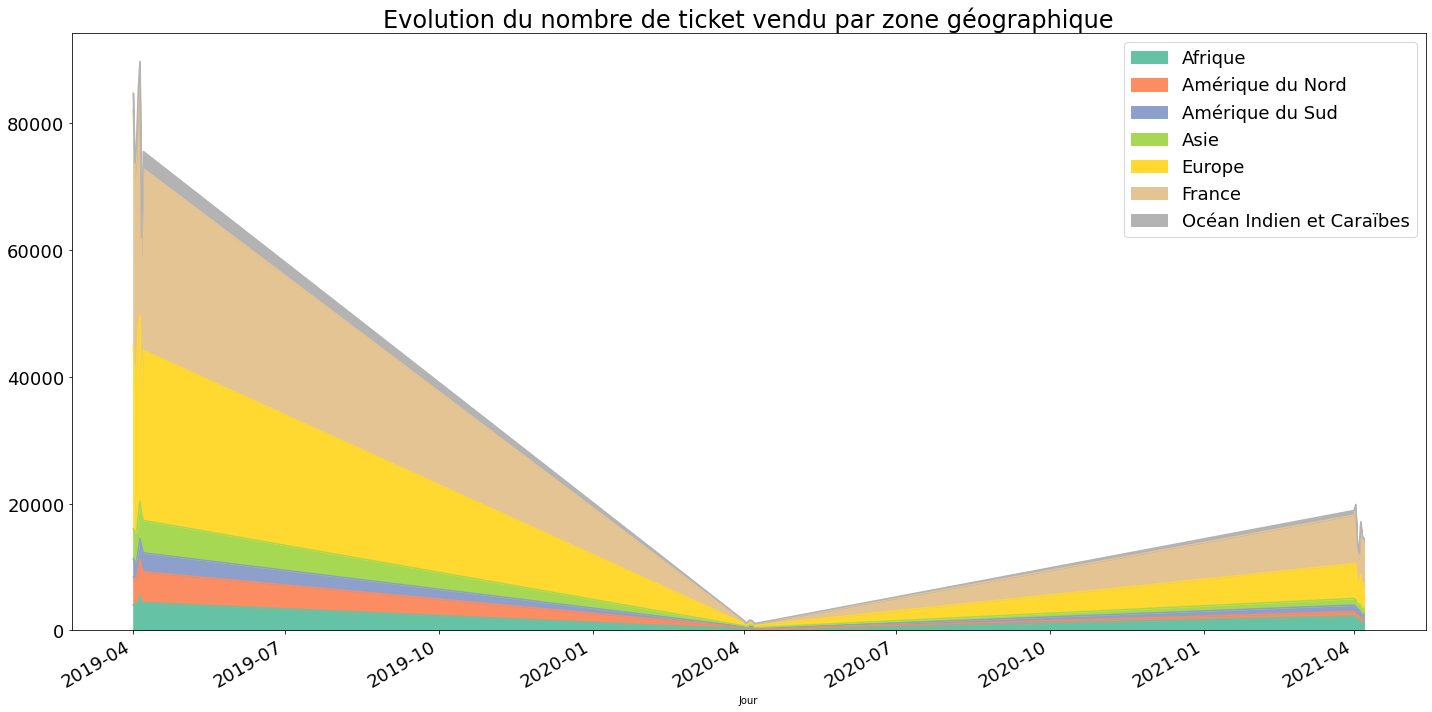

In [321]:
# Filtrage
DATA = df.groupby([df.FLIGHT_DATE,
                                  df["Group_Geo"]
                                  ]).agg({"TKT_NUM": "nunique"}).reset_index().rename(
    columns={"FLIGHT_DATE": "Jour"})

# Pivot Table
plotdata = pd.pivot_table(DATA, values="TKT_NUM", index="Jour", columns="Group_Geo", aggfunc='mean')

# Création du graphique de l'Evolution du nombre de ticket vendu par zone géographique
plt.figure()
plotdata.plot(kind='area', figsize= (20,10), colormap="Set2")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc= 1, prop={'size': 18})
plt.title("Evolution du nombre de ticket vendu par zone géographique", fontsize=24)
plt.tight_layout()
plt.savefig("1_global_geo_1.png", transparent = True)
plt.show()

In [306]:
# Nouveau filtrage pour le ticket moyen
DATA = df.groupby([df.FLIGHT_DATE.dt.year, df.ACTIVITY_TIER,
                                  df["Group_Geo"]
                                  ]).agg({"TKT_NUM": "nunique", "NET_REV": "sum"}).reset_index().rename(
    columns={"FLIGHT_DATE": "Année"})

In [307]:
# Création de la colonne ticket moyen
DATA["Rev_ticket_moyen"] = DATA["NET_REV"] / DATA["TKT_NUM"]

<Figure size 432x288 with 0 Axes>

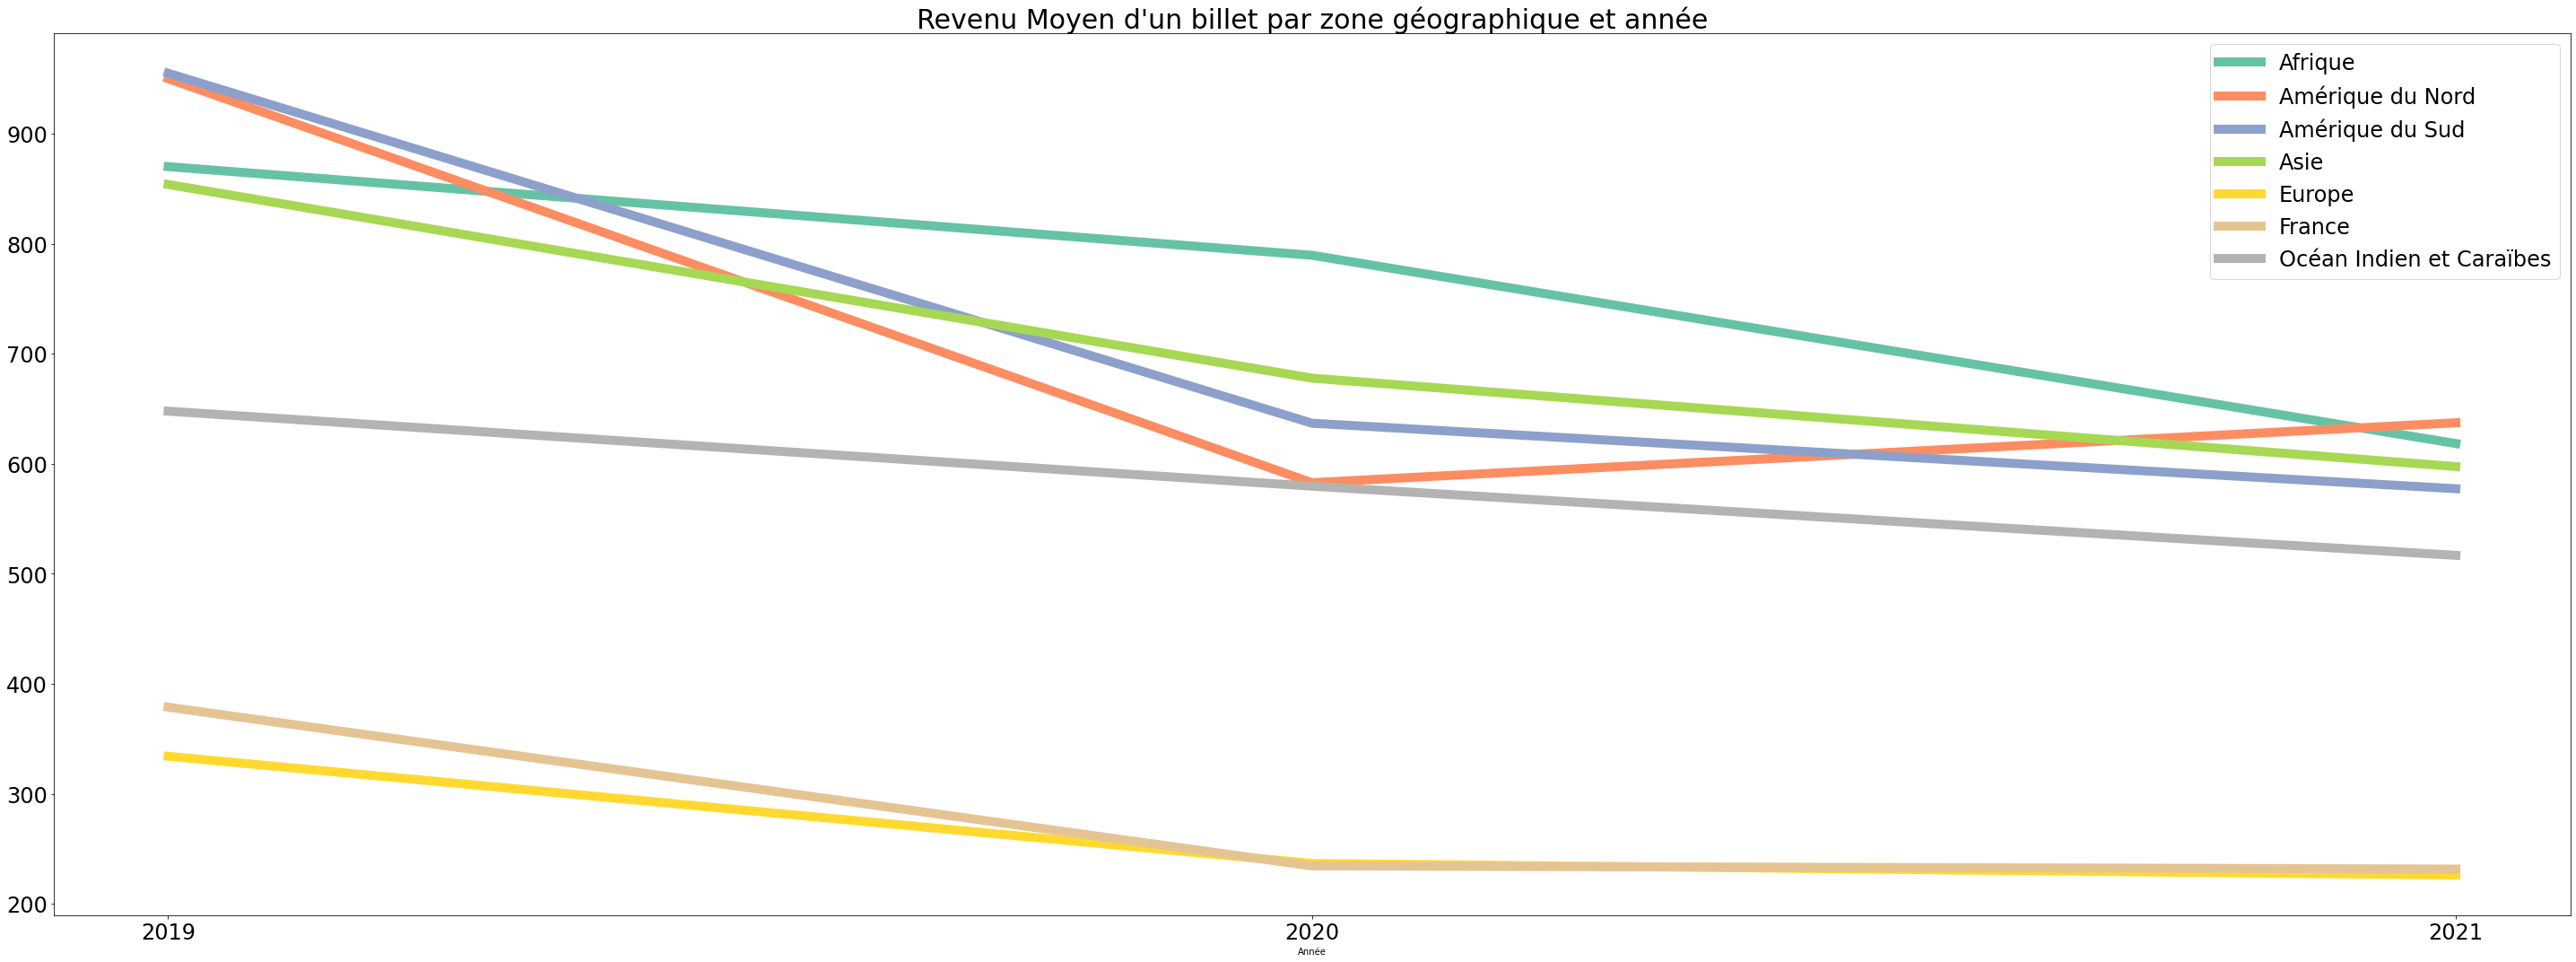

In [318]:
# Création du graph de l'évolution du ticket moyen par zone
plotdata = pd.pivot_table(DATA, values="Rev_ticket_moyen", index="Année", columns="Group_Geo", aggfunc='mean')

plt.figure()
plotdata.plot(kind='line', figsize= (40,15), colormap="Set2", lw=10)
plt.locator_params(axis='x', nbins=3)
plt.title("Revenu Moyen d'un billet par zone géographique et année", fontsize = 30)
plt.tight_layout()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc= 1, prop={'size': 24})
plt.tight_layout()
plt.savefig("1_global_geo_rev_tick_moy.png", transparent = True)
plt.show()

### Analyse Contribution Client

In [347]:
# Nouveau filtrage pour le ticket moyen
DATA = df.groupby([df.FLIGHT_DATE.dt.year, df.ACTIVITY_TIER,
                                  df["Contrib_Client"]
                                  ]).agg({"TKT_NUM": "nunique", "NET_REV": "sum"}).reset_index().rename(
    columns={"FLIGHT_DATE": "Année"})

In [348]:
# Création de la colonne ticket moyen
DATA["Rev_ticket_moyen"] = DATA["NET_REV"] / DATA["TKT_NUM"]

<Figure size 432x288 with 0 Axes>

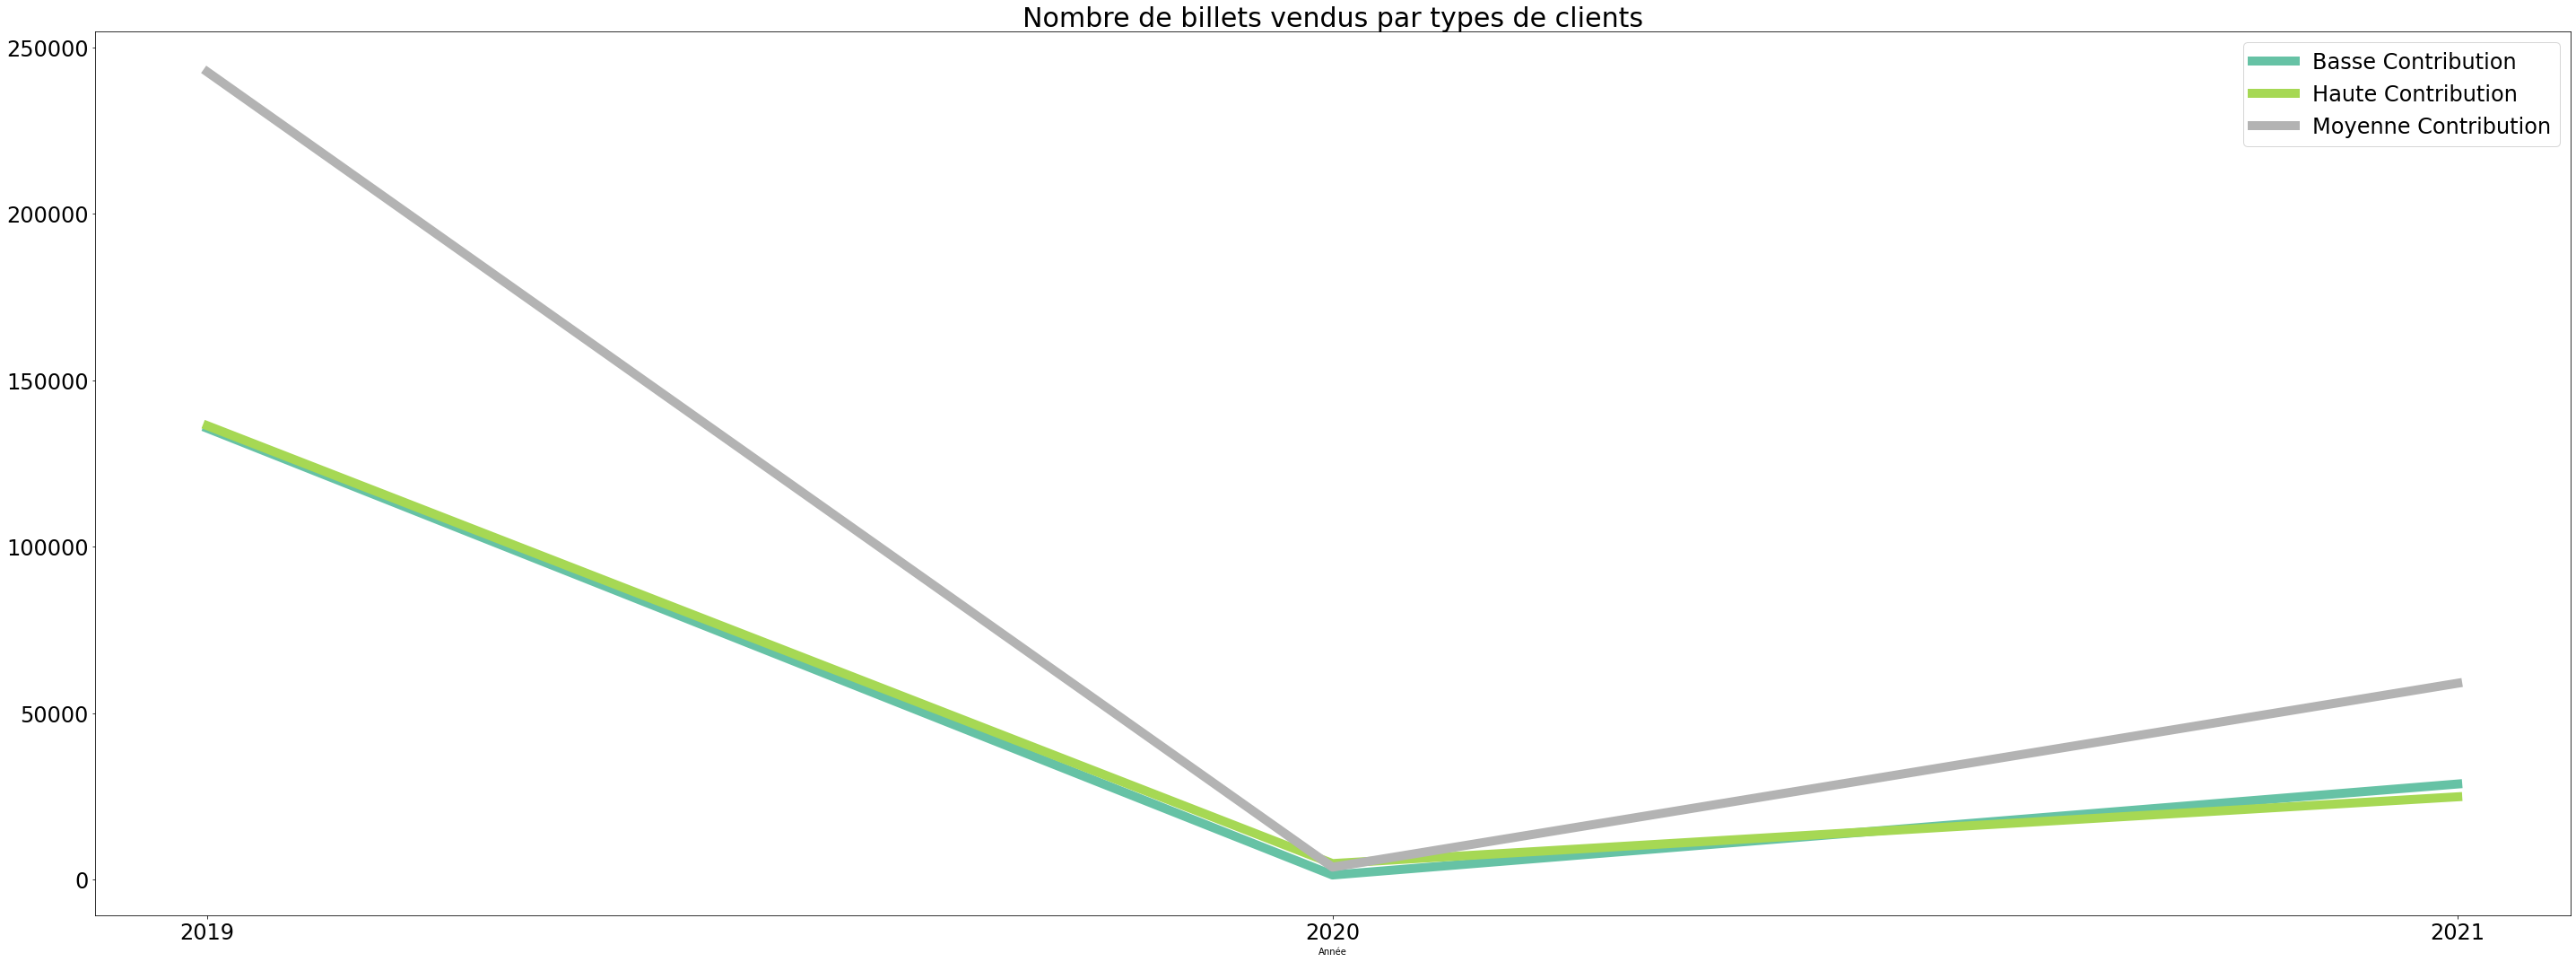

In [345]:
# Création du graph de l'évolution du ticket moyen par zone
plotdata = pd.pivot_table(DATA, values="TKT_NUM", index="Année", columns="Contrib_Client", aggfunc='mean')

plt.figure()
plotdata.plot(kind='line', figsize= (40,15), colormap="Set2", lw=10)
plt.locator_params(axis='x', nbins=3)
plt.title("Nombre de billets vendus par types de clients", fontsize = 30)
plt.tight_layout()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc= 1, prop={'size': 24})
plt.tight_layout()
plt.savefig("1_contrib_billets.png", transparent = True)
plt.show()

<Figure size 432x288 with 0 Axes>

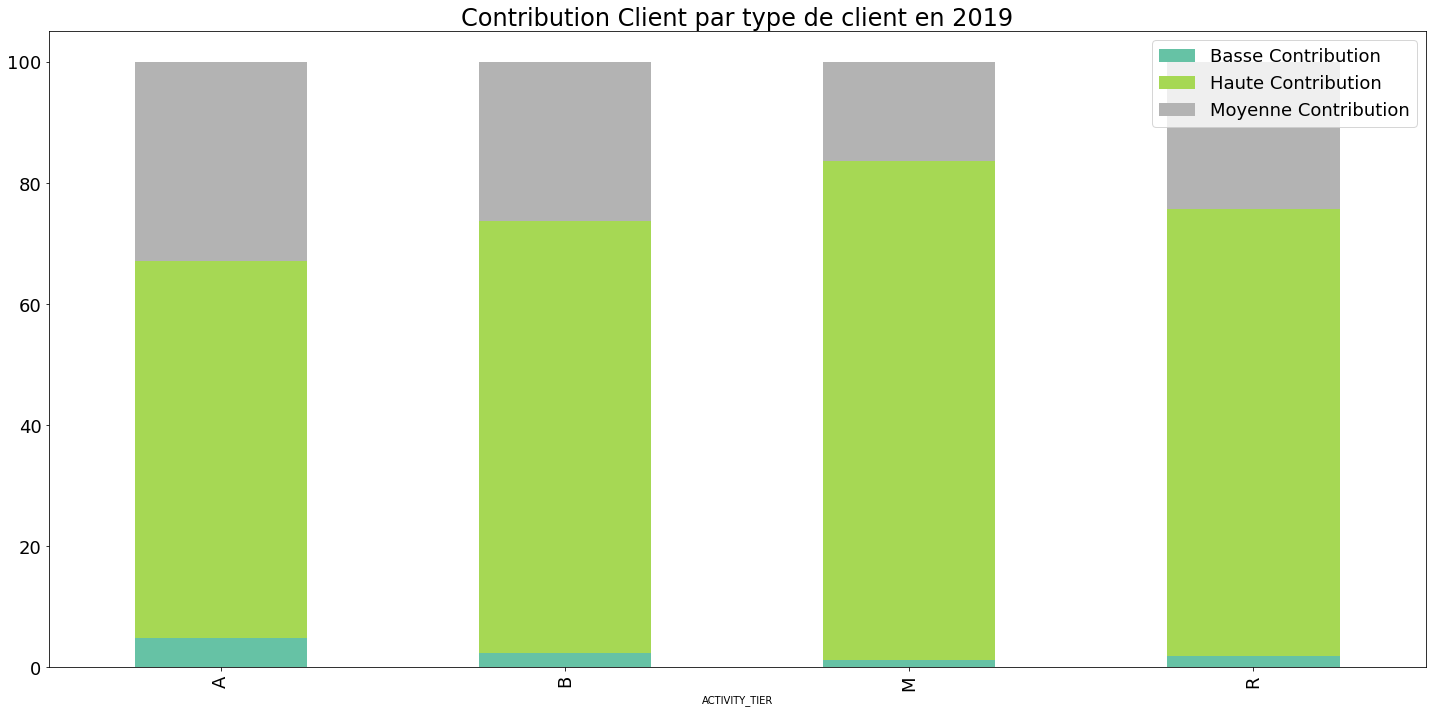

<Figure size 432x288 with 0 Axes>

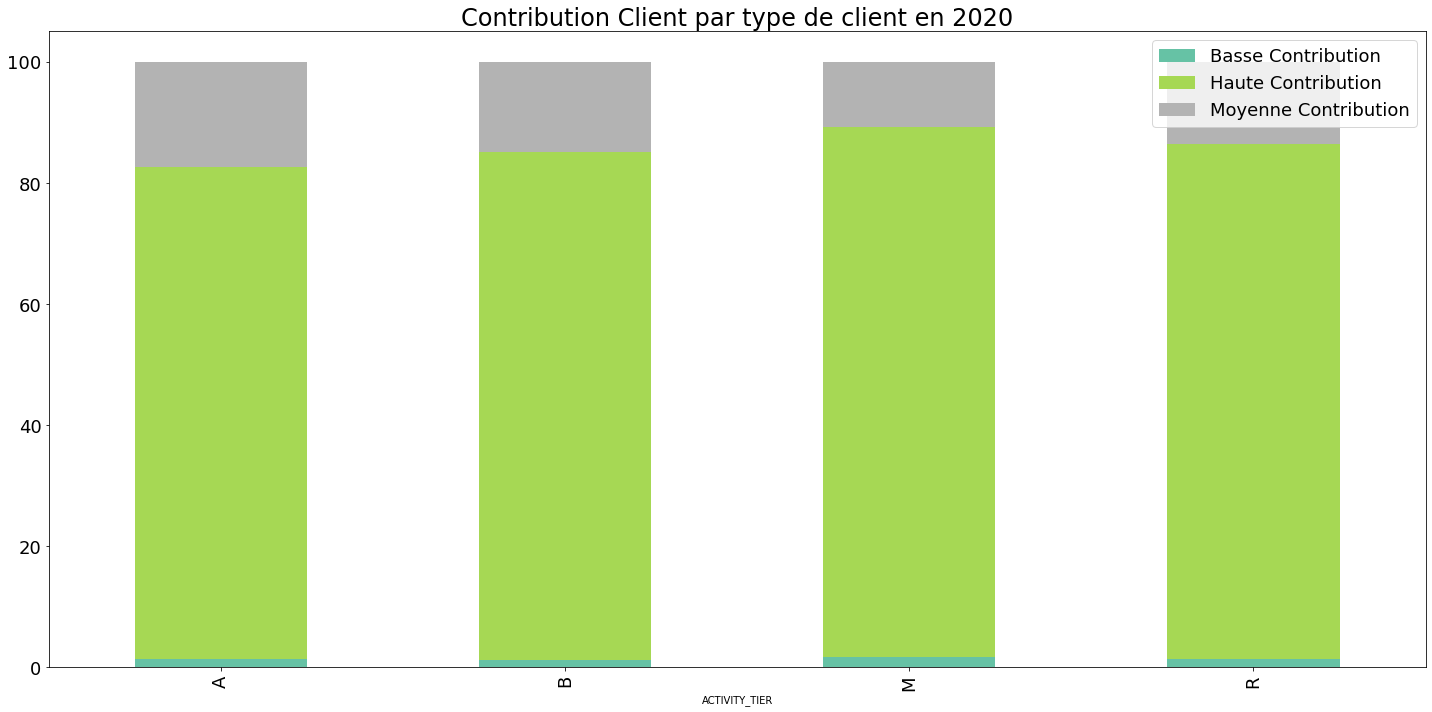

<Figure size 432x288 with 0 Axes>

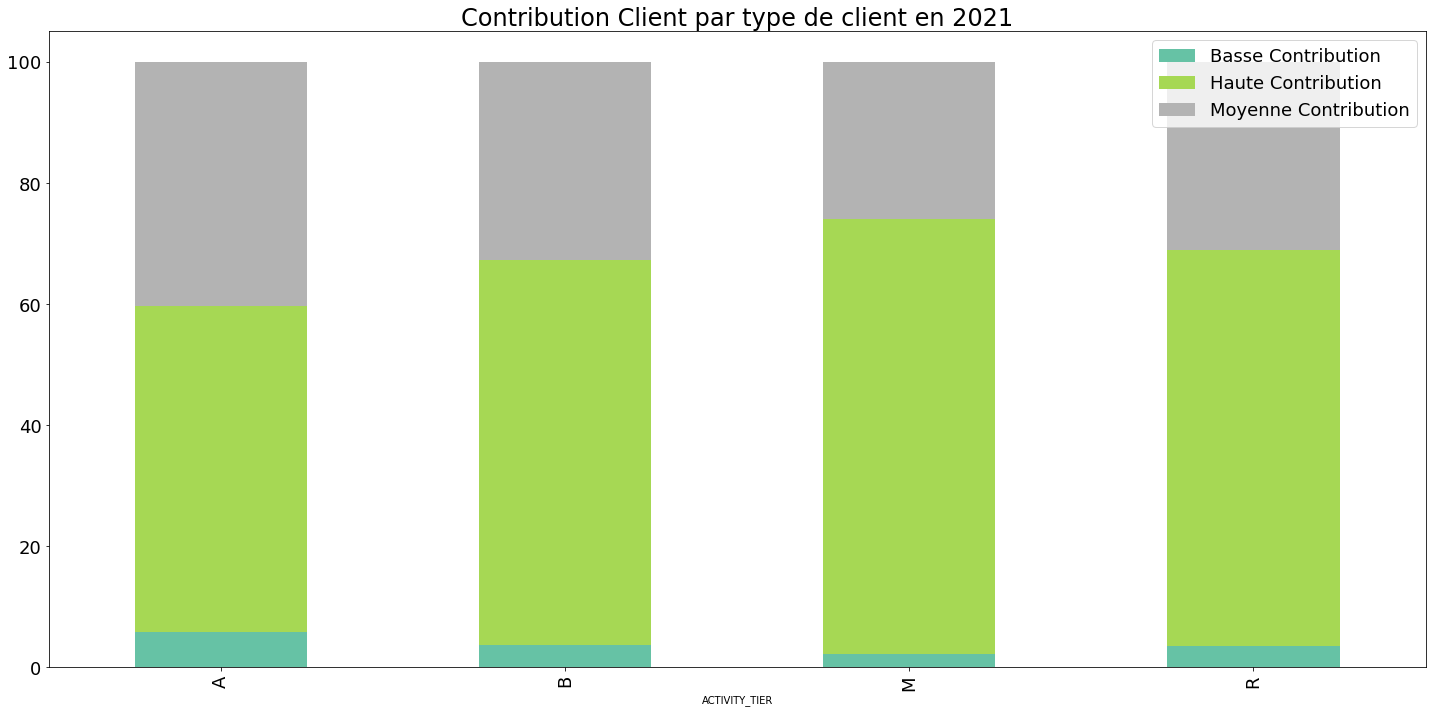

In [353]:
for annee in list(set(list(DATA["Année"]))):
    
    plotdata = pd.pivot_table(DATA[DATA["Année"]==annee], values="NET_REV", index="ACTIVITY_TIER", 
                              columns="Contrib_Client", aggfunc='sum')
    # Création du graph
    plt.figure()
    stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
    stacked_data.plot(kind="bar", stacked=True, figsize=(20, 10), colormap="Set2")
    plt.title("Contribution Client par type de client en {}".format(annee), fontsize = 24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(loc= 1, prop={'size': 18})
    plt.tight_layout()
    plt.savefig("1_contrib_clients_{}".format(annee), transparent=True)
    plt.show()

<Figure size 432x288 with 0 Axes>

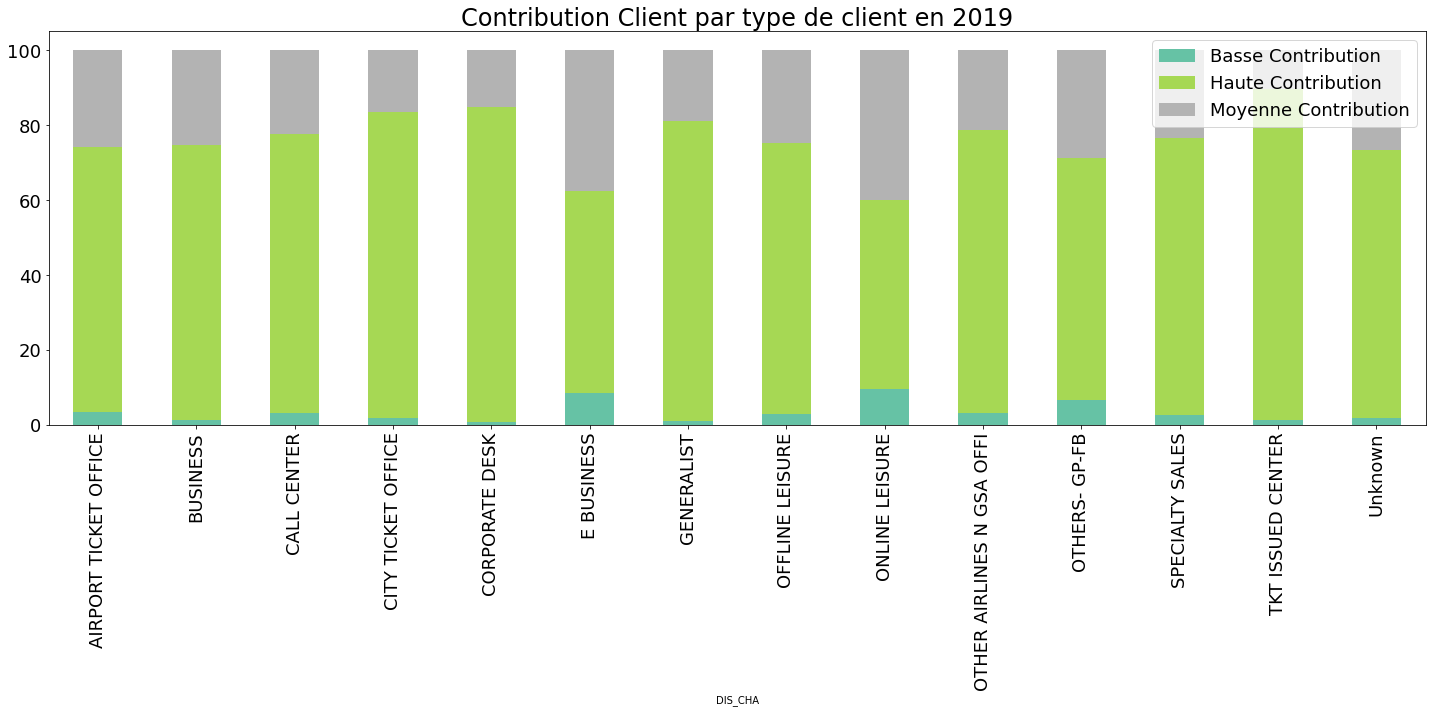

<Figure size 432x288 with 0 Axes>

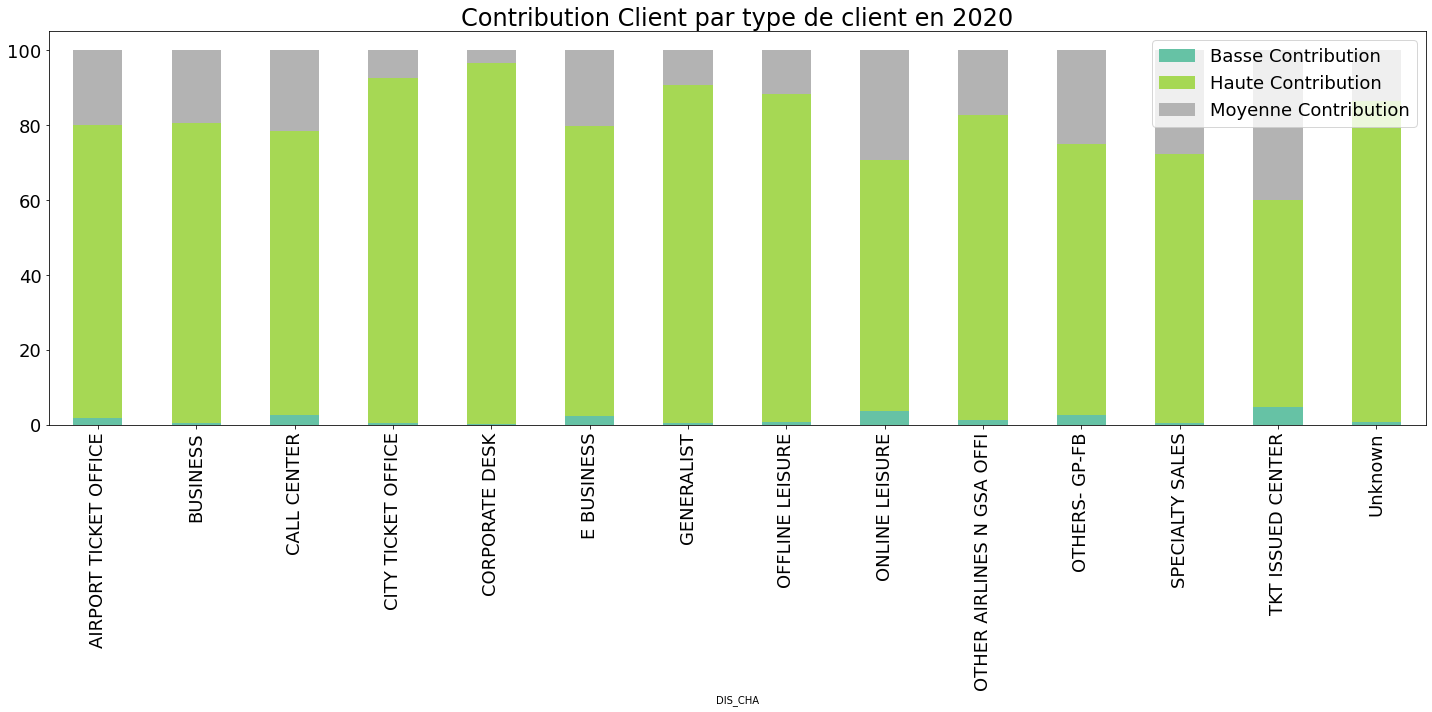

<Figure size 432x288 with 0 Axes>

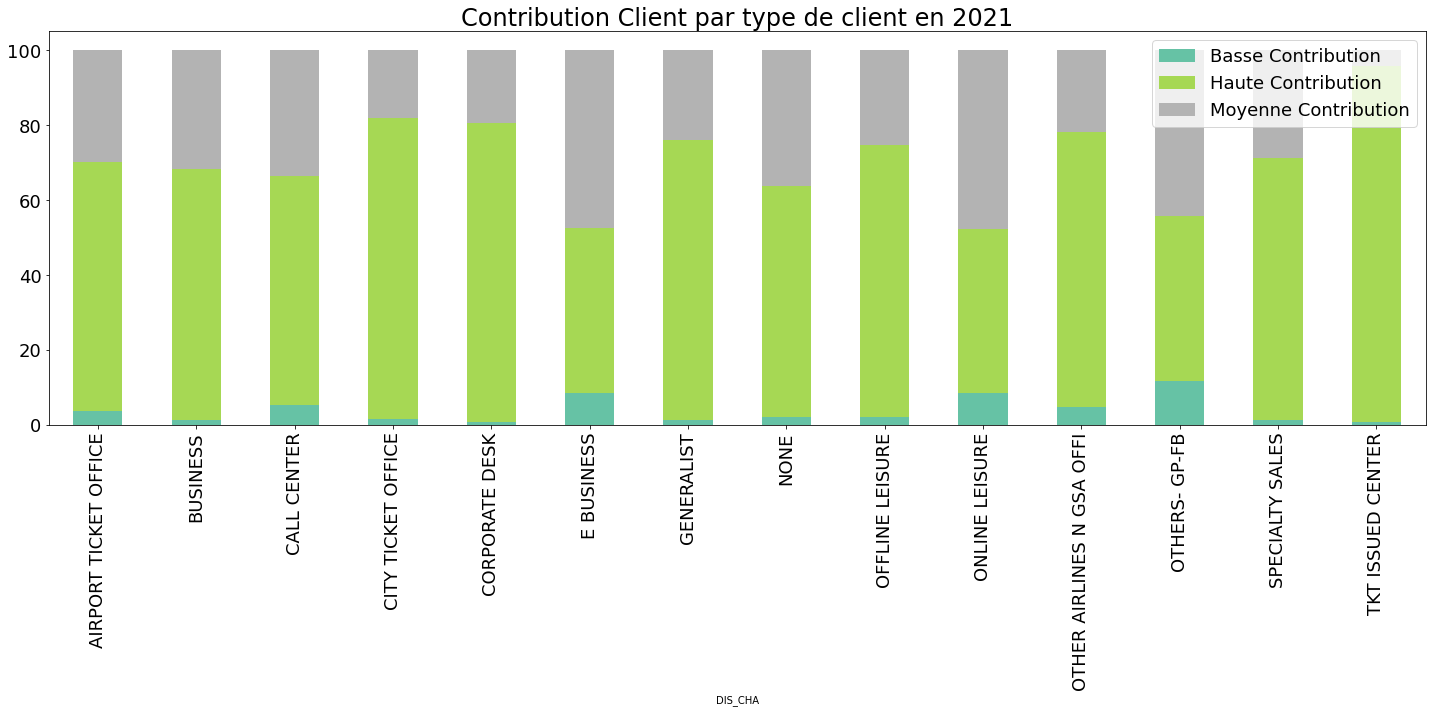

In [354]:
# Nouveau filtrage pour le ticket moyen
DATA = df.groupby([df.FLIGHT_DATE.dt.year, df.DIS_CHA,
                                  df["Contrib_Client"]
                                  ]).agg({"TKT_NUM": "nunique", "NET_REV": "sum"}).reset_index().rename(
    columns={"FLIGHT_DATE": "Année"})

for annee in list(set(list(DATA["Année"]))):
    
    plotdata = pd.pivot_table(DATA[DATA["Année"]==annee], values="NET_REV", index="DIS_CHA", 
                              columns="Contrib_Client", aggfunc='sum')
    # Création du graph
    plt.figure()
    stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
    stacked_data.plot(kind="bar", stacked=True, figsize=(20, 10), colormap="Set2")
    plt.title("Contribution Client par type de client en {}".format(annee), fontsize = 24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(loc= 1, prop={'size': 18})
    plt.tight_layout()
    plt.savefig("1_contrib_clients_{}".format(annee), transparent=True)
    plt.show()

In [377]:
# Création de la colonne ticket moyen
DATA["Rev_ticket_moyen"] = DATA["NET_REV"] / DATA["TKT_NUM"]

In [385]:
DATA_2019 = pd.pivot_table(DATA[DATA["Année"]==2019], values="Rev_ticket_moyen", index="DIS_CHA", 
                              columns="Contrib_Client", aggfunc='mean')

DATA_2021 = pd.pivot_table(DATA[DATA["Année"]==2021], values="Rev_ticket_moyen", index="DIS_CHA", 
                              columns="Contrib_Client", aggfunc='mean')

new_DATA = DATA_2021.div(DATA_2019).sub(1).dropna()

In [386]:
new_DATA

Contrib_Client,Basse Contribution,Haute Contribution,Moyenne Contribution
DIS_CHA,,,
AIRPORT TICKET OFFICE,0.032621,-0.228242,0.014419
BUSINESS,-0.024471,-0.304445,-0.233510
CALL CENTER,0.031558,-0.272665,-0.095504
CITY TICKET OFFICE,0.005460,-0.165606,-0.046522
CORPORATE DESK,-0.067392,-0.269908,-0.219958
E BUSINESS,0.071441,-0.193219,-0.087019
GENERALIST,0.003261,-0.262236,-0.171378
OFFLINE LEISURE,0.033151,-0.014130,-0.066682
ONLINE LEISURE,0.131675,0.033426,-0.028610


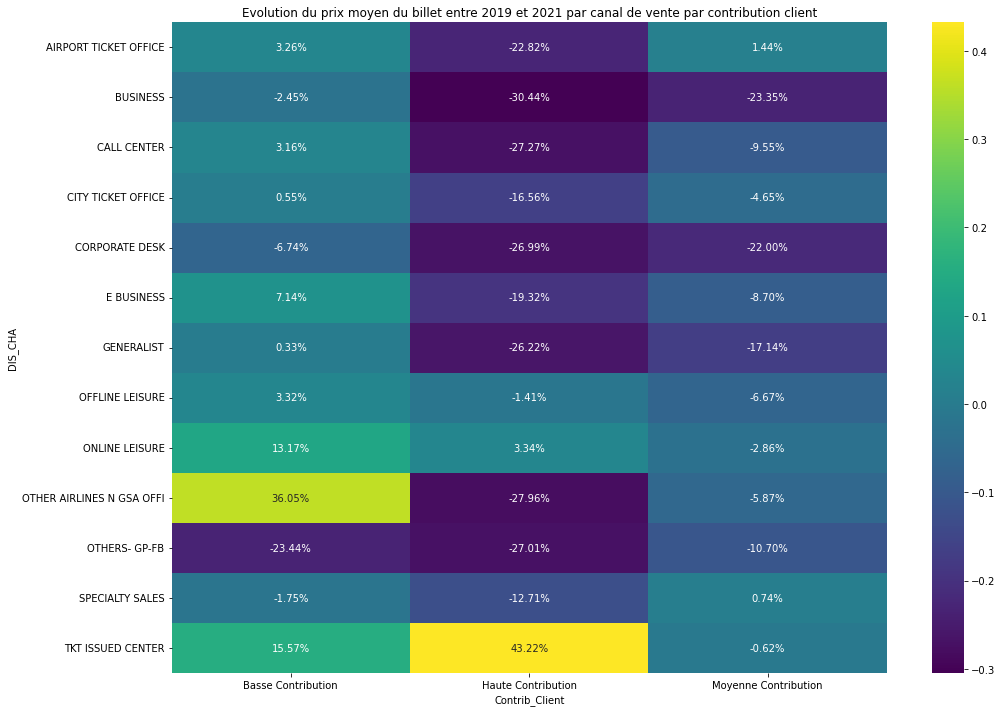

In [391]:
plt.figure(figsize=(15,10))
sns.heatmap(new_DATA, annot=True, fmt='.2%', cmap='viridis')
plt.title("Evolution du prix moyen du billet entre 2019 et 2021 par canal de vente par contribution client")
plt.tight_layout()
plt.savefig("1_contrb_canal.png", transparent= True)
plt.show()

# PARTIE 2 - Lead Time Moyen

In [407]:
# Nous créeons le filtre
DATA = df[(df["Contrib_Client"]=="Haute Contribution") & (df["ONLINE_FLAG"])]
DATA.loc[:,"LEAD_TIME"] = (DATA.loc[:,"PNR_DAT_AMD"] - DATA.loc[:,"FLIGHT_DATE"]).dt.days

/Users/karimderouiche/miniforge3/envs/Karim_env/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [411]:
new_data = DATA[["FLIGHT_DATE", "LEAD_TIME"]].groupby(DATA.FLIGHT_DATE.dt.year).agg({"LEAD_TIME": "mean"})*(-1)

<Figure size 432x288 with 0 Axes>

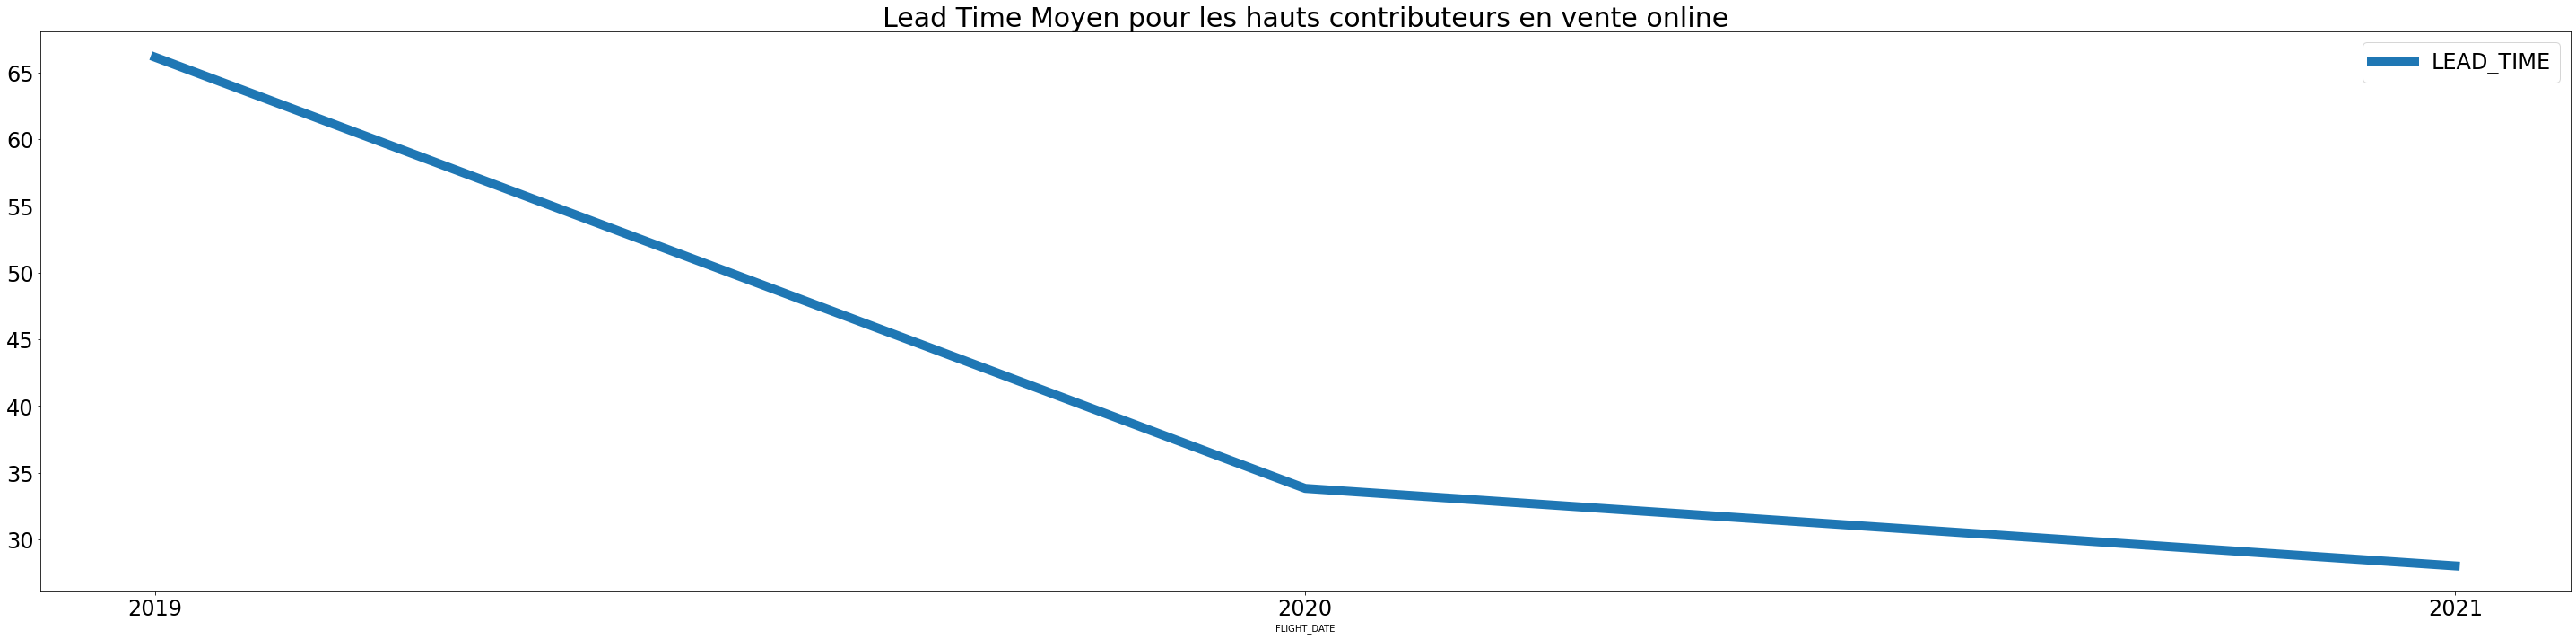

In [416]:
plt.figure()
new_data.plot(kind='line', figsize= (40,10), lw=10)
plt.locator_params(axis='x', nbins=3)
plt.title("Lead Time Moyen pour les hauts contributeurs en vente online", fontsize = 30)
plt.tight_layout()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc= 1, prop={'size': 24})
plt.tight_layout()
plt.savefig("2_lead_time.png", transparent = True)
plt.show()


In [415]:
new_data

,LEAD_TIME
FLIGHT_DATE,
2019,66.141350
2020,33.809493
2021,27.998325
